# What is tensor?

Tensors are a generalization of matrices to an arbitrary number of dimensions (note that in the context of tensors, a dimension is often called an axis).

In [2]:
>>> import numpy as np
>>> x = np.array(12)
>>> x

array(12)

In [3]:
>>> x.ndim

0

In [4]:
x.ndim

0

Don’t confuse a 5D vector with a 5D tensor! A 5D vector has only one axis and has five dimensions along its axis, whereas a 5D tensor has five axes (and may have any number of dimensions along each axis)

# Matrices

In [5]:
>>> x = np.array([[5, 78, 2, 34, 0],
                  [6, 79, 3, 35, 1],
                  [7, 80, 4, 36, 2]])
>>> x.ndim

2

In [6]:
x

array([[ 5, 78,  2, 34,  0],
       [ 6, 79,  3, 35,  1],
       [ 7, 80,  4, 36,  2]])

In [7]:
>>> x = np.array([[[5, 78, 2, 34, 0],
                   [6, 79, 3, 35, 1],
                   [7, 80, 4, 36, 2]],
                  [[5, 78, 2, 34, 0],
                   [6, 79, 3, 35, 1],
                   [7, 80, 4, 36, 2]],
                  [[5, 78, 2, 34, 0],
                   [6, 79, 3, 35, 1],
                   [7, 80, 4, 36, 2]]])
>>> x.ndim

3

In [8]:
x

array([[[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]]])

In deep learning, you’ll generally manipulate tensors that are 0D to 4D, although you may go up to 5D if you process video data

MSINT Example

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [1]:

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 2s 0us/step


In [2]:
train_images.ndim

3

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images.dtype

dtype('uint8')

# Displaying the forth digit

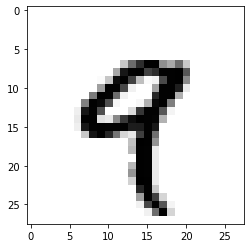

In [8]:
digit = train_images[4]

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

# tensor slicing

In [9]:
>>> my_slice = train_images[10:100]
>>> print(my_slice.shape)

(90, 28, 28)


In [12]:
# same thing as above but in different form
>>> my_slice = train_images[10:100, :, :]
>>> my_slice.shape

(90, 28, 28)

In [11]:
>>> my_slice = train_images[10:100, 0:28, 0:28]
>>> my_slice.shape

(90, 28, 28)

In [14]:
my_slice = train_images[:, 14:, 14:]
my_slice.shape

(60000, 14, 14)

In [16]:
# crop the image in the middle
my_slice = train_images[:, 7:-7, 7:-7]
my_slice.shape

(60000, 14, 14)

# Dividing the data into batches

In [18]:
batch = train_images[:128]
batch.shape

(128, 28, 28)

In [19]:
batch.ndim

3

In [22]:
batch = train_images[128:256]
batch.shape

(128, 28, 28)

# And the nth batch: 

In [27]:
batch = train_images[128 * 1:128 * (1 + 1)]
batch.shape

(128, 28, 28)

# Data tensors 

    1. Vector data— 2D tensors of shape (samples, features)
    
    2. Timeseries data or sequence data— 3D tensors of shape (samples, timesteps, features)
    
    3. Images— 4D tensors of shape (samples, height, width, channels) or (samples, channels, height, width)
    
    4. Video— 5D tensors of shape (samples, frames, height, width, channels) or (samples, frames, channels, height, width)


# A 3D timeseries data tensor

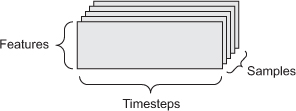


# A 4D image data tensor (channels-first convention)
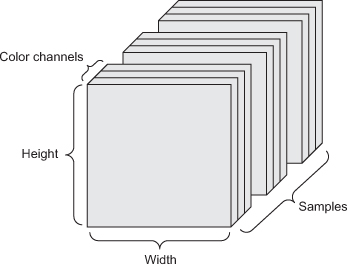


# The gears of neural networks: tensor operations 

In [46]:
import keras

from keras import models

keras.layers.Dense(512, activation='relu')

In [11]:
output = relu(dot(W, input) + b)

NameError: name 'relu' is not defined

In [14]:
def naive_relu(x):
    assert len(x.shape) == 2

    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [13]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape

    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [15]:
import numpy as np

z = x + y

z = np.maximum(z, 0.)

NameError: name 'x' is not defined

In [18]:
# Naive Implementation
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]

    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [20]:
import numpy as np

x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))

z = np.maximum(x, y)

# Tensor dot 

The dot operation, also called a tensor product (not to be confused with an element-wise product) is the most common, most useful tensor operation. Contrary to element-wise operations, it combines entries in the input tensors. 

In [22]:
# Numpy and Keras dot product example
import numpy as np
z = np.dot(x, y)

In [ ]:
# in mathmatical term
z = x . y

In [23]:
# what does dot operation does?
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]

    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z
	
	#1 - x and y are Numpy vectors.

You can also take the dot product between a matrix x and a vector y, which returns a vector where the coefficients are the dot products between y and the rows of x.

In [24]:
# Example
import numpy as np

def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]

    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z
	

In [27]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [28]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]

    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z
	

# Matrix dot-product box diagram
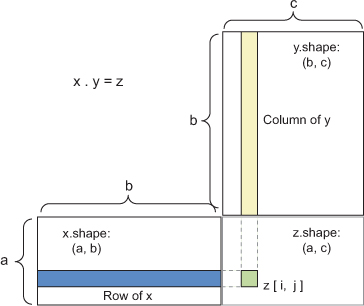

# Tensor reshaping 

In [32]:
# it is one of the essential tensor operation out of there

train_images = train_images.reshape((60000, 28 * 28))

# Reshaping tensor example

In [36]:
x = np.array([[0., 1.],
                 [2., 3.],
                 [4., 5.]])
print(x.shape)
(3, 2)

x = x.reshape((6, 1))
x

(3, 2)


array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [37]:
x = x.reshape((2, 3))
x

array([[0., 1., 2.],
       [3., 4., 5.]])

In [39]:
# transporting 
>>> x = np.zeros((300, 20))

>>> x = np.transpose(x)

>>> print(x.shape)



(20, 300)


# Geometric interpretation of tensor operations 

In [40]:
A = [0.5, 1]

# A point in a 2D space

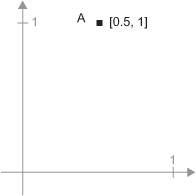

# A point in a 2D space pictured as an arrow

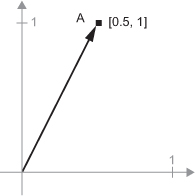

# Geomatric Implementation of sum of two vectors
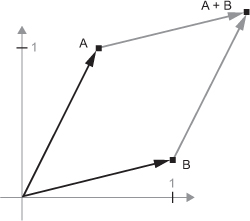

In [ ]:
output = relu(dot(W, input) + b)

# What’s a derivative? 

Let’s say you increase x by a small factor epsilon_x: this results in a small epsilon_y change to y.

In [43]:
# calculating derivatives
f(x + epsilon_x) = y + epsilon_y

# Derivative of f in p

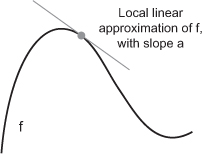


# Derivative of a tensor operation: the gradient 

A gradient is the derivative of a tensor operation. It’s the generalization of the concept of derivatives to functions of multidimensional inputs: that is, to functions that take tensors as inputs

In [ ]:

y_pred = dot(W, x)
loss_value = loss(y_pred, y)

In [44]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [50]:
import tensorflow as tf
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [51]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [52]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5


ValueError: in user code:

    /Users/praladneupane/Library/Python/3.7/lib/python/site-packages/tensorflow/python/keras/engine/training.py:571 train_function  *
        outputs = self.distribute_strategy.run(
    /Users/praladneupane/Library/Python/3.7/lib/python/site-packages/tensorflow/python/distribute/distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/praladneupane/Library/Python/3.7/lib/python/site-packages/tensorflow/python/distribute/distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/praladneupane/Library/Python/3.7/lib/python/site-packages/tensorflow/python/distribute/distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/praladneupane/Library/Python/3.7/lib/python/site-packages/tensorflow/python/keras/engine/training.py:533 train_step  **
        y, y_pred, sample_weight, regularization_losses=self.losses)
    /Users/praladneupane/Library/Python/3.7/lib/python/site-packages/tensorflow/python/keras/engine/compile_utils.py:205 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /Users/praladneupane/Library/Python/3.7/lib/python/site-packages/tensorflow/python/keras/losses.py:143 __call__
        losses = self.call(y_true, y_pred)
    /Users/praladneupane/Library/Python/3.7/lib/python/site-packages/tensorflow/python/keras/losses.py:246 call
        return self.fn(y_true, y_pred, **self._fn_kwargs)
    /Users/praladneupane/Library/Python/3.7/lib/python/site-packages/tensorflow/python/keras/losses.py:1527 categorical_crossentropy
        return K.categorical_crossentropy(y_true, y_pred, from_logits=from_logits)
    /Users/praladneupane/Library/Python/3.7/lib/python/site-packages/tensorflow/python/keras/backend.py:4561 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    /Users/praladneupane/Library/Python/3.7/lib/python/site-packages/tensorflow/python/framework/tensor_shape.py:1117 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 1) and (None, 10) are incompatible
